## Подготовка

Для начала подготовим исходный код программы, чтобы он выводил данные в удобном для последующей обработки виде. 
Поправим программу, чтобы она сразу запускалась нужное количество раз и выводила для каджого запуска результат в отдельную строчки через пробел. Для каждого типа умножения создадим отдельный файл.

В данном блокноте обработаны файлы для результатов от 1000 до 1100 с шагом 1.
Ниже можно найти код обработки файлов и собственно графики.

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

simple_results = []
with open('simple_results_1000_1100.txt') as fin:
    for line in fin:
        simple_results.append([float(n) for n in line.split()])
        
block_results = []
with open('block_results_1000_1100.txt') as fin:
    for line in fin:
        block_results.append([float(n) for n in line.split()])
        
swapped_results = []
with open('swapped_results_1000_1100.txt') as fin:
    for line in fin:
        swapped_results.append([float(n) for n in line.split()])


plt.rcParams["figure.figsize"] = (15, 5)

## Простое умножение матриц

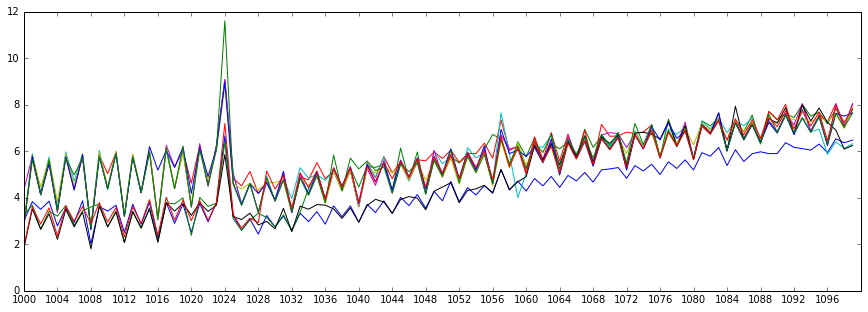

In [20]:
for results in simple_results:
    plt.plot(xrange(1000, 1100), results)

plt.xticks(np.arange(1000, 1100, 4))
plt.show()

Мы видим что данный алгоритм "прыгает" вверх вниз в зависимочти от размера матрицы. 
Время работы сильно зависит от размера матрицы, в том смысле, что размер матрицы делится на размер кэша. В этих случаях мы имеем пики графика. 
Самый большой выброс мы видим на размере матрицы 1024х1024. Это значит что на данном размере мы получаем наибольшее количество cashe-miss'ов.  

## Блочное умножение матриц

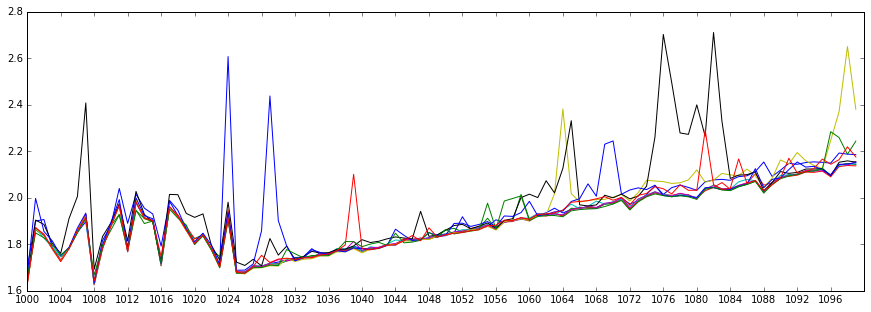

In [22]:
for results in block_results:
    plt.plot(xrange(1000, 1100), results)

plt.xticks(np.arange(1000, 1100, 4))
plt.show()

До размера 1024 мы видим странную "прыгающую" закономертность, которая исчезает после 1024х1024. 
Также можно заметить небольшие, но стабильные понижения графика в точка 1024 + 16*х (1040, 1056, 1088) и менее заметные 1024 + 8*х, но без предыдущих (1064, 1080, 1096). Скорее всего это связано с тем, что на данных размерах строки в размер кэша кратен размеру строк в блоках, и поэтому они влазят в кэш целиком и реже требуют замены (только когда строка уже не нужна). 

## Свапнутое умножение

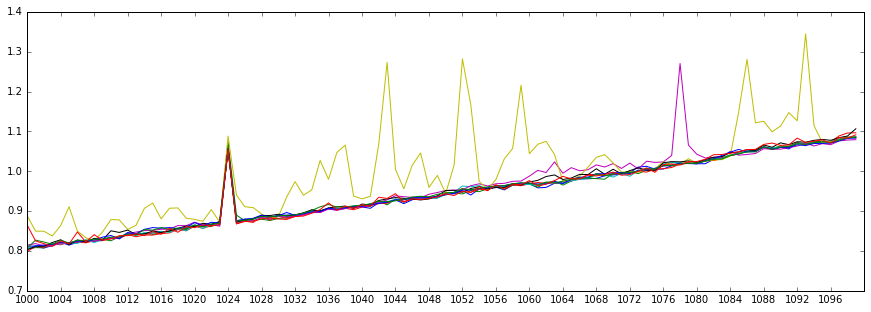

In [23]:
for results in swapped_results:
    plt.plot(xrange(1000, 1100), results)


plt.xticks(np.arange(1000, 1100, 4))
plt.show()

Можно заметить, что данный метод работает очень стабильно и равномерно. Но мы видим, что на размере матрицы 1024х1024 есть заметный пик, что говорит о том, на этом размере происходит больше cache-miss'ов. 

## Сравнение трех методов вместе

Для общего графика сравнени посчитаем среднее значение для каждого метода, чтобы итоговый график был менее визуально загруженным. 

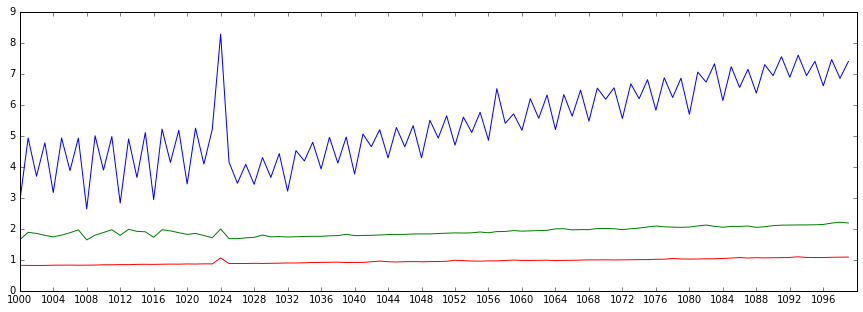

In [28]:
import matplotlib.pyplot as plt

average_simple = np.sum(simple_results, axis=0) / len(simple_results)
average_block = np.sum(block_results, axis=0) / len(block_results)
average_swapped = np.sum(swapped_results, axis=0) / len(swapped_results)

plt.plot(xrange(1000, 1100), average_simple)
plt.plot(xrange(1000, 1100), average_block)
plt.plot(xrange(1000, 1100), average_swapped)

plt.xticks(np.arange(1000, 1100, 4))
plt.show()

Легко можно заметить сильную нестабильность простого умножения в зависимости от размера. Чего нельзя сказать о двух других методах. Но блочный метод также немного нестабилен на размерах матри до 1024х1024, далее идет почти прямая линия. Свапнутое умножение - самый стабильный метод из трех. 

Для всех трех методом мы можем видет заметный всплеск на рамере матрицы 1024х1024. Это связано с бОльшим количеством cache-miss'ов. 